In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Настраиваем размер графиков по умолчанию

In [3]:
sns.set(rc={'figure.figsize': (9,6)})

## Изучаем данные

    event_data_train.csv - данные о действиях, которые совершают студенты со стэпами    
* *step_id* - id стэпа
* *user_id* - анонимизированный id юзера
* *timestamp* - время наступления события в формате unix date
* *action* - событие, возможные значения: 
    * *discovered* - пользователь перешел на стэп
    * *viewed* - просмотр шага,
    * *started_attempt* - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
    * *passed* - удачное решение практического шага

In [152]:
events = pd.read_csv('event_data_train.csv')
events['date'] = pd.to_datetime(events.timestamp, unit='s')
events['day'] = events['date'].dt.date
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   step_id    int64         
 1   timestamp  int64         
 2   action     object        
 3   user_id    int64         
 4   date       datetime64[ns]
 5   day        object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 159.3+ MB


    submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям    

* *step_id* - id стэпа
* *timestamp* - время отправки решения в формате unix date
* *submission_status* - статус решения
* *user_id* - анонимизированный id юзера

In [153]:
submissions = pd.read_csv('submissions_data_train.csv')
submissions['date'] = pd.to_datetime(submissions.timestamp, unit='s')
submissions['day'] = submissions['date'].dt.date
submissions

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [165]:
steps_total = np.size(events.step_id.unique()) #количество уникальных степов
print(steps_total)

198


In [166]:
submitted_steps_total = np.size(submissions.step_id.unique()) #количество уникальных заданий
print(submitted_steps_total)

76


In [167]:
users_total = np.size(events.user_id.unique()) #количество уникальных студентов
print(users_total)

19234


In [168]:
submitted_users_total = np.size(submissions.user_id.unique()) 
#количество уникальных студентов, решавших практические задания
print(submitted_users_total)

9940


Распределение количества уникальных студентов по дням

<AxesSubplot:xlabel='day'>

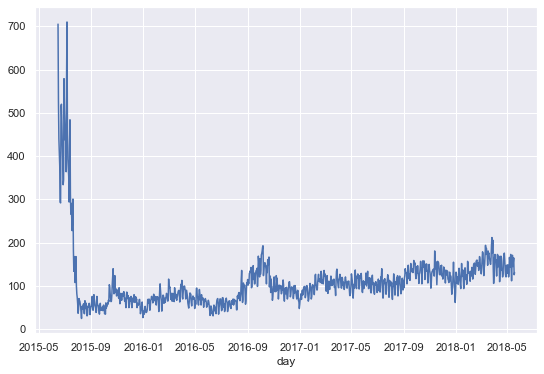

In [161]:
events.groupby('day').agg(unique_ids = ('user_id', 'nunique'))
events.groupby('day').user_id.nunique().plot()

Сводная таблица по всем событиям (discovered,passed,started_attempt,viewed) для каждого юзера

In [177]:
events_pivot = events.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).\
    reset_index()
assert(users_total == events_pivot.shape[0])
events_pivot

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


Распределение открытых степов

<AxesSubplot:>

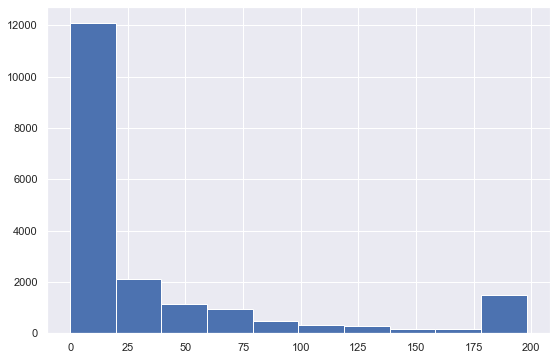

In [164]:
events_pivot.discovered.hist()

Сводная таблица по уникальным степам и действиям (discovered,passed,started_attempt,viewed) для каждого юзера (количество уникальных событий не может быть больше 76 для passed и 198 для discovered, view)

In [178]:
unique_events_pivot = events.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='nunique', fill_value=0).\
    reset_index()
#студенты, прощедшие все степы и закончившие курс полностью
passed_students_actions = unique_events_pivot[unique_events_pivot["passed"] == 198]
#условие
condition_passed_students = events['user_id'].isin(passed_students_actions['user_id'].to_list())
#таблица действий студентов, полностью закончивших курс
passed_students_events = events[condition_passed_students].reset_index().drop(columns=['index'])
assert(users_total == unique_events_pivot.shape[0])
unique_events_pivot

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,9
2,3,91,87,29,91
3,5,11,11,2,11
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,8
19230,26793,1,0,1,1
19231,26794,69,69,29,69
19232,26797,10,10,2,10


Сводная таблица по ответам на практические задания среди студентов

In [172]:
submissions_pivot = submissions.pivot_table(index='user_id', columns='submission_status', values='step_id' , aggfunc='count', fill_value=0)
assert(submitted_users_total == submissions_pivot.shape[0])
submissions_pivot

True


submission_status,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1
...,...,...
26787,3,0
26790,1,0
26794,33,9


Количество пройденных практических заданий каждым студентом

In [189]:
passed_tasks_by_user = submissions.query('submission_status == "correct"').\
    groupby(['user_id']).\
    agg(passed_tasks = ("step_id",'nunique')).reset_index()
passed_tasks_by_user = passed_tasks_by_user.merge(submissions_pivot, on='user_id', how='outer').fillna(0)
assert(passed_tasks_by_user.shape[0] == submitted_users_total)
passed_tasks_by_user

,user_id,passed_tasks,correct,wrong
0,2,2.0,2,0
1,3,29.0,29,23
2,5,2.0,2,2
3,8,9.0,9,21
4,16,76.0,77,106
...,...,...,...,...
9935,25472,0.0,0,1
9936,25727,0.0,0,1
9937,25914,0.0,0,4
9938,26349,0.0,0,1


Статистика выполнения практических заданий

In [191]:
users_completed_all_tasks = passed_tasks_by_user[passed_tasks_by_user['passed_tasks'] == 76].shape[0]

print("Количество студентов, выполнивших все задания: ", users_completed_all_tasks)
tried_by_succeed = users_completed_all_tasks / submitted_users_total * 100

print("Процент студентов, выполнивших все задания, среди всех, кто пытался: ", tried_by_succeed)
total_succeed = users_completed_all_tasks / users_total * 100

print("Процент студентов, выполнивших все задания среди всех студентов: ", total_succeed)

Количество студентов, выполнивших все задания:  574
Процент студентов, выполнивших все задания, среди всех, кто пытался 5.774647887323944
Процент студентов, выполнивших все задания среди всех студентов 2.9842986378288447


## Нужно понять, кто из студентов "отвалился" с курса к последней дате в данных

Определение всех промежутков между началом и окончанием курса в днях без привязки к id студентов

90-й процентиль перерыва в днях по всем студентам =  18


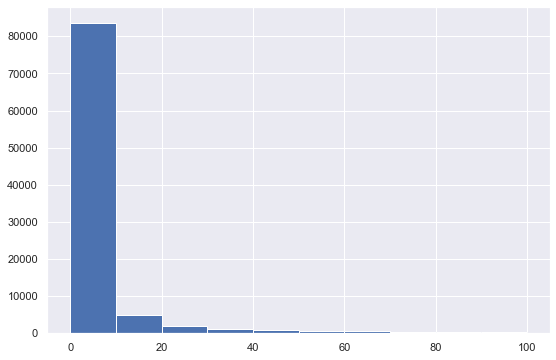

In [201]:
#Определение всех промежутков между началом и окончанием курса в днях без привязки к id студентов
unique_days_of_users = events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])
gap_date = unique_days_of_users.groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_date = pd.Series(np.concatenate(gap_date)) / (24*60*60)
gap_date[gap_date < 100].hist()
"С вероятностью 90% максимальный промежуток перерыва по всем студентам не превышал"
print("90-й процентиль перерыва в днях по всем студентам = ", int(gap_date.quantile(0.90))) 

90-й процентиль перерыва в днях по завершившим курс студентам =  12


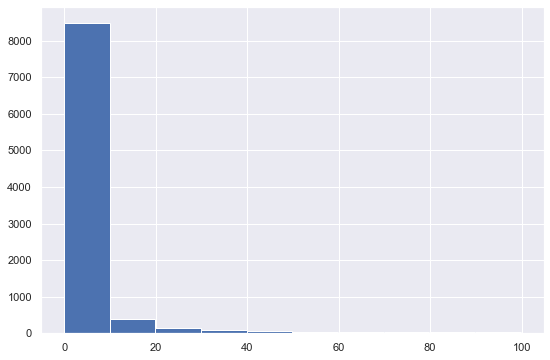

In [200]:
unique_passed_users_days = passed_students_events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])
gap_date_p=unique_passed_users_days.groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_date_p = pd.Series(np.concatenate(gap_date_p)) / (24*60*60)
gap_date_p[gap_date_p < 100].hist()
print("90-й процентиль перерыва в днях по завершившим курс студентам = ", int(gap_date_p.quantile(0.90))) 

## Итоговый dataframe